<a href="https://colab.research.google.com/github/NAT12SHOZ/NETFLIX_PYTHON/blob/main/NETFLIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

**LOAD DATASET**

In [2]:
df = pd.read_csv('data/Netflix_dataset.csv')

**INITIAL EXPLORATION**

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


**DATA CLEANING**

**FILLING MISSING VALUES**

In [7]:
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Unknown')

**DROP ROWS WHERE CRITICAL COLUMNS ARE MISSING**

In [8]:
df.dropna(subset=['date_added'], inplace=True)

**CONVERT DATE_ADDED TO DATETIME**

In [9]:
df['date_added'] = pd.to_datetime(
    df['date_added'].str.strip(),
    errors='coerce'
)


In [10]:
df.dropna(subset=['date_added'], inplace=True)


**EXTRACT YEAR**

In [11]:
df['year_added'] = df['date_added'].dt.year

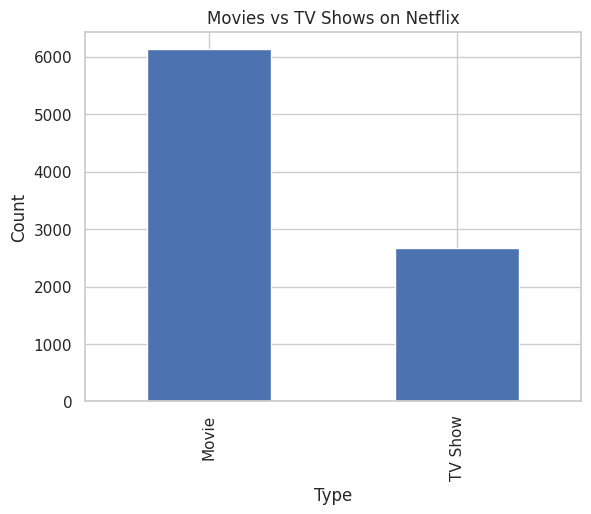

In [12]:
plt.figure()
df['type'].value_counts().plot(kind='bar')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

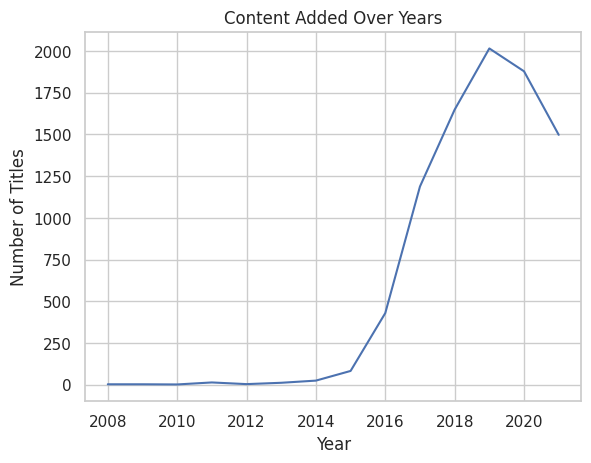

In [13]:
plt.figure()
df['year_added'].value_counts().sort_index().plot()
plt.title('Content Added Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

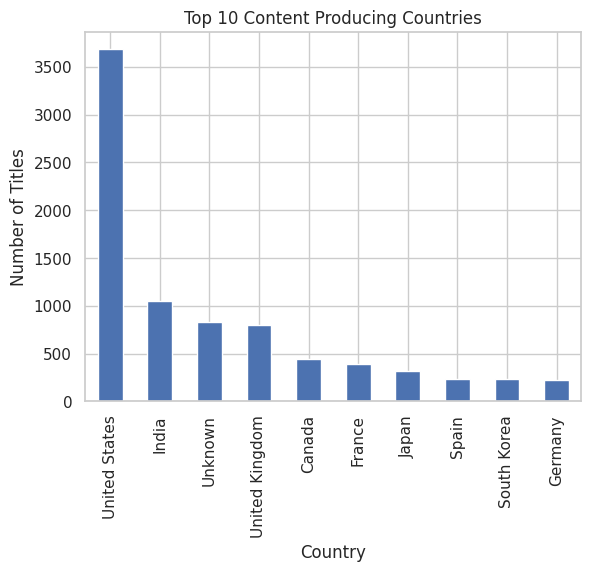

In [14]:
country_count = df['country'].str.split(', ').explode().value_counts().head(10)
plt.figure()
country_count.plot(kind='bar')
plt.title('Top 10 Content Producing Countries')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

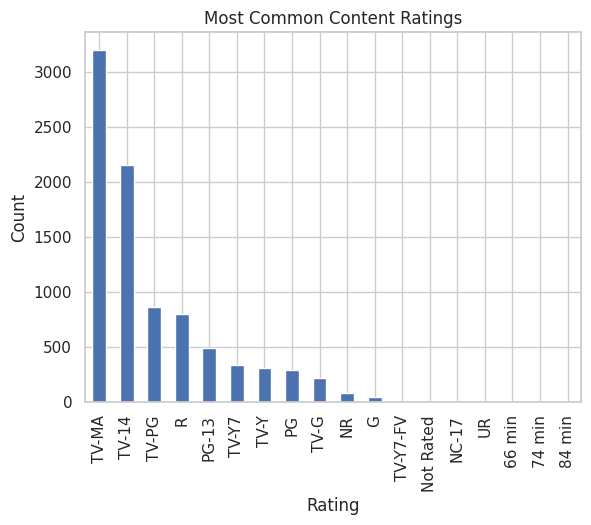

In [15]:
plt.figure()
df['rating'].value_counts().plot(kind='bar')
plt.title('Most Common Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

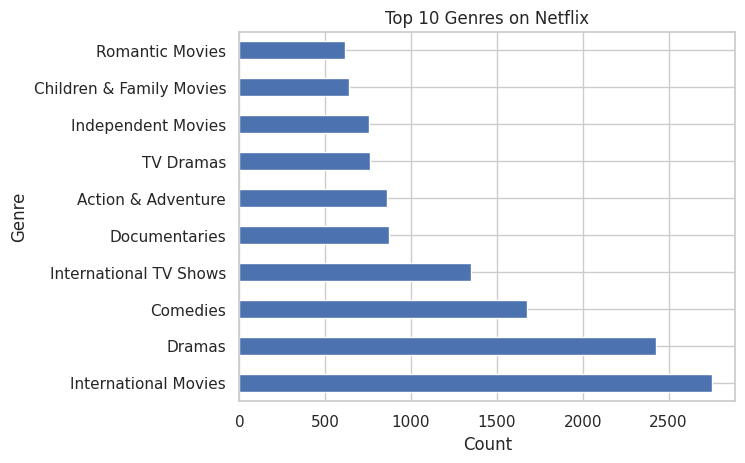

In [16]:
genre_count = df['listed_in'].str.split(', ').explode().value_counts().head(10)


plt.figure()
genre_count.plot(kind='barh')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**INSIGHTS:-**

*   MOVIES DOMINATE NETFLIX CONTENT COMPARED TO TV SHOWS.
*   RAPID GROWTH IN CONTENT AFTER 2015.
*   USA AND INDIA ARE TOP CONTENT PRODUCERS.
*   INTERNATIONAL MOVIES IS THE MOST COMMON GENRE.

